In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [42]:
proj = pd.read_csv("C:\\Users\\srich\\Desktop\\project_newday\\year3\\ML\\tempData\\EMOAEventData.csv")
proj

,Trial,Stimulus,Participant,Fixation Count,Fixation Duration Total [ms],Saccade Count,Saccade Duration Total [ms],Saccade Amplitude Total [°],Blink Count,Scanpath Length [px]
0,Trial001,MCQ1,STUD-P01,33,15894369,38,819.4,35.9,3,4930
1,Trial001,MCQ1,STUD-P02,45,16776943,45,898.9,41.2,0,7115
2,Trial001,MCQ1,STUD-P03,41,11943779,38,1016.3,92.2,12,9773
3,Trial001,MCQ1,STUD-P04,55,22215175,50,1382.2,103.5,1,13116
4,Trial001,MCQ1,STUD-P05,24,10629981,24,566.0,44.2,2,3662
...,...,...,...,...,...,...,...,...,...,...
70,Trial005,MCQ5,STUD-P11,29,10745558,29,784.0,61.2,2,4785
71,Trial005,MCQ5,STUD-P12,26,8912917,26,499.6,30.0,0,4493
72,Trial005,MCQ5,STUD-P13,54,12260893,59,2382.3,189.1,6,10216
73,Trial005,MCQ5,STUD-P14,38,9097022,46,3314.8,513.5,4,9320


In [43]:
y = proj['Scanpath Length [px]']
proj.loc[proj['Stimulus']=="MCQ1","Stimulus"]=1
proj.loc[proj['Stimulus']=="MCQ2","Stimulus"]=2
proj.loc[proj['Stimulus']=="MCQ3","Stimulus"]=3
proj.loc[proj['Stimulus']=="MCQ4","Stimulus"]=4
proj.loc[proj['Stimulus']=="MCQ5","Stimulus"]=5
X = proj[["Stimulus"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 13749973.192763668
Root Mean Squared Error (RMSE): 3708.09562885906
Mean Absolute Percentage Error (MAPE): 51.733875980914604%
R-squared (R²) score: 0.04661329746031728


In [47]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 11531758.34292447
Root Mean Squared Error (RMSE): 3395.844275423193
Mean Absolute Percentage Error (MAPE): 44.74566908524368%
R-squared (R²) score: 0.026557739336910857


In [51]:
y = proj['Scanpath Length [px]']
X = proj.drop(["Trial", "Scanpath Length [px]","Participant",], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 8682258.344041241
Root Mean Squared Error (RMSE): 2946.5672135624604
Mean Absolute Percentage Error (MAPE): 26.153960502010786%
R-squared (R²) score: 0.3979952151776244


In [55]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 2759309.6010508304
Root Mean Squared Error (RMSE): 1661.1169739217135
Mean Absolute Percentage Error (MAPE): 17.186491798519665%
R-squared (R²) score: 0.7670755407769752


In [69]:
kmeans = KMeans(n_clusters=10, random_state=0,n_init="auto").fit(X_train)
print(kmeans.labels_)
kmeans.cluster_centers_

[2 1 9 5 2 0 4 6 2 9 7 2 5 8 7 7 3 1 2 7 5 0 0 4 7 7 7 1 7 4 8 1 0 4 2 2 8
 2 7 5 7 7 7 3 5 2 4 2 5 4 5 2 3 0 2 4 9 2 2 5]


C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[1.80000000e+00, 4.28000000e+01, 1.63174394e+07, 4.12000000e+01,
        9.30520000e+02, 5.73800000e+01, 1.80000000e+00],
       [2.75000000e+00, 7.42500000e+01, 3.25309700e+07, 7.35000000e+01,
        1.76212500e+03, 9.82500000e+01, 5.50000000e+00],
       [2.42857143e+00, 3.22857143e+01, 1.08453849e+07, 3.16428571e+01,
        8.24878571e+02, 6.76428571e+01, 4.21428571e+00],
       [2.00000000e+00, 5.43333333e+01, 2.20160190e+07, 4.66666667e+01,
        1.07700000e+03, 6.42666667e+01, 2.00000000e+00],
       [3.85714286e+00, 3.07142857e+01, 8.34212757e+06, 3.18571429e+01,
        1.24927143e+03, 1.42142857e+02, 3.71428571e+00],
       [3.25000000e+00, 5.38750000e+01, 1.79924551e+07, 5.51250000e+01,
        2.03877500e+03, 1.85837500e+02, 3.37500000e+00],
       [5.00000000e+00, 1.25000000e+02, 3.98664310e+07, 1.08000000e+02,
        4.21480000e+03, 4.39900000e+02, 6.00000000e+00],
       [2.75000000e+00, 4.39166667e+01, 1.31711909e+07, 4.37500000e+01,
        1.27990833e+03, 1

In [76]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
print(silhouette_score(X_train, kmeans.labels_))
print(calinski_harabasz_score(X_train, kmeans.labels_))
print(davies_bouldin_score(X_train, kmeans.labels_))

C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6282960445026916
116.25773381492512
0.5808874937861195


In [77]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train)
print(silhouette_score(X_train, kmeans.labels_))
print(calinski_harabasz_score(X_train, kmeans.labels_))
print(davies_bouldin_score(X_train, kmeans.labels_))


C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5746880235884301
274.38310469811324
0.5028913318725456


C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

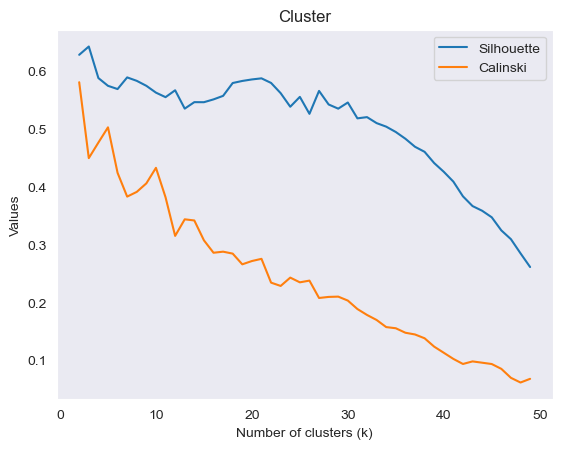

In [93]:
s_list = list()
c_list = list()
d_list = list()
cluster_count = list()
distortion = list()

for i in range(2, 50):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_train)
    cluster_count.append(i)
    s_list.append(silhouette_score(X_train, kmeans.labels_))
    c_list.append(calinski_harabasz_score(X_train, kmeans.labels_))
    d_list.append(davies_bouldin_score(X_train, kmeans.labels_))
    distortion.append((kmeans.inertia_))

plt.title('Cluster')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Values')
plt.plot(cluster_count, s_list, label = "Silhouette")
# plt.plot(cluster_count, c_list, label = "Calinski")
plt.plot(cluster_count, d_list, label = "Davies")
plt.grid()
plt.legend(['Silhouette', 'Calinski', 'Davies'])
plt.show()

Text(0, 0.5, 'Calinski')

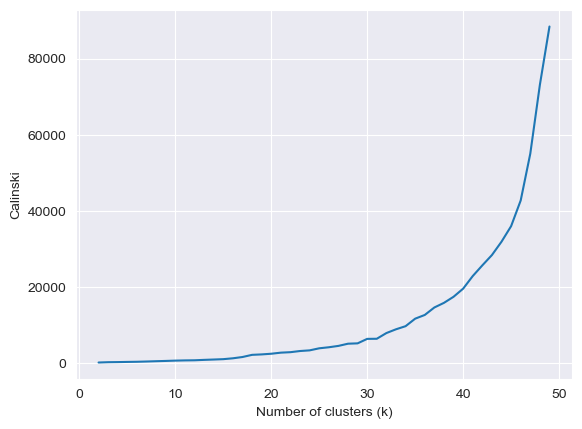

In [94]:
plt.plot(cluster_count, c_list, label = "Calinski")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski')

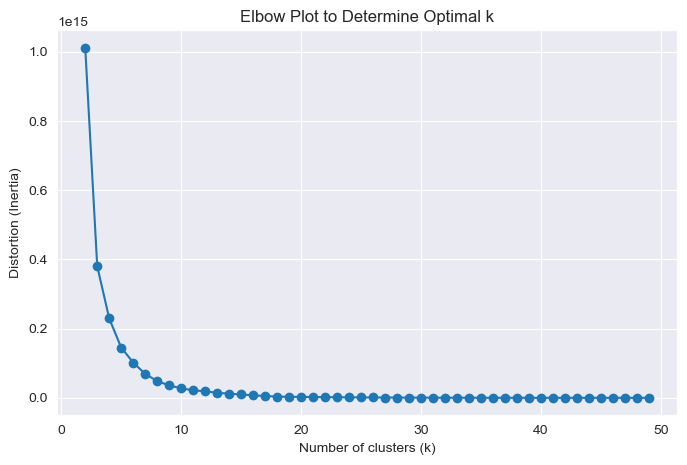

In [95]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_count, distortion, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot to Determine Optimal k')
plt.show()